In [1]:
import pandas as pd

In [2]:
dados = pd.read_excel('./dados/POP2021_20230710.xls', usecols=[0,2], skipfooter=7, header=1)

In [3]:
# gastos_pop = pd.read_csv('./dados/A152918189_28_143_208.csv')
# gastos_pop
import chardet
with open('./dados/A152918189_28_143_208.csv', 'rb') as file:
    code = chardet.detect(file.read())
code['encoding']

'ISO-8859-1'

In [4]:
gastos_pop = pd.read_csv('./dados/A152918189_28_143_208.csv', encoding='ISO-8859-1', sep=";",engine='python', skiprows=3, skipfooter=11)

In [5]:
gastos_pop['Unidade da Federação'] = gastos_pop['Unidade da Federação'].str.replace('[0-9]{2}','',regex=True).str.strip()

In [6]:
gastos_pop.columns.isin(['2020/Jan']).sum()

1

In [7]:
gastos_pop_concat = pd.concat([gastos_pop[gastos_pop.columns[0]], gastos_pop.loc[:, '2020/Jan':'2020/Dez']], axis=1, ignore_index=False)

In [8]:
colunas_2020 = gastos_pop_concat.iloc[:, 1:].columns

In [9]:
resultado = [ gastos_pop_concat[colunas_2020[i]].replace(',','.',regex=True).astype('float64') for i in range(len(colunas_2020)) ]

In [10]:
gastos_pop_concat[colunas_2020] = pd.DataFrame(resultado).T

In [11]:
gastos_por_estado = [gastos_pop_concat.loc[i, colunas_2020].sum().round(2) for i in range(gastos_pop_concat.shape[0])]

In [12]:
gastos_pop_concat.insert(loc=gastos_pop_concat.shape[1], column='Total', value=gastos_por_estado)

<Axes: xlabel='Unidade da Federação'>

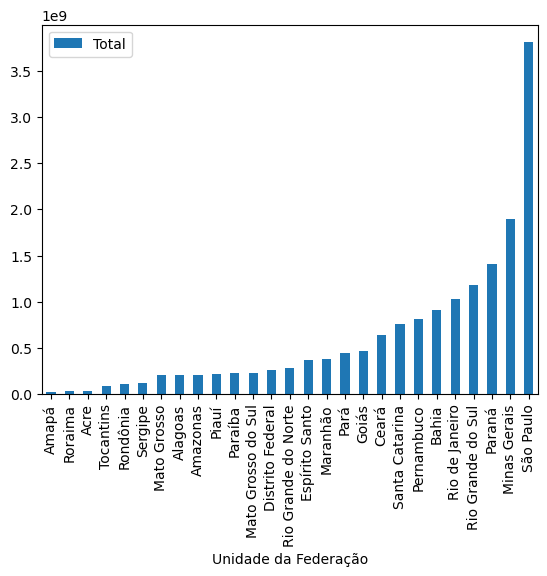

In [13]:
gastos_pop_concat[:-1].sort_values(by='Total').plot(kind='bar', x = 'Unidade da Federação', y = 'Total')


In [14]:
gastos_total = gastos_pop_concat.iloc[-1:,1:-1].copy()

In [15]:
gastos_total = pd.Series(gastos_total.iloc[0], name='Gastos 2020')

<Axes: >

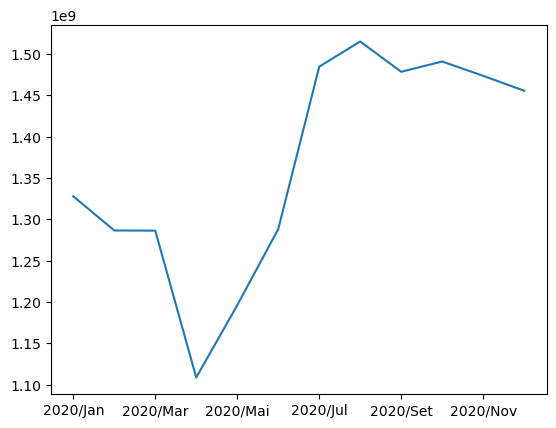

In [16]:
gastos_total.plot(kind='line', x=gastos_total.index.tolist(), y=gastos_total.values.tolist())

In [17]:
df_gastos_2020 = pd.DataFrame(gastos_total)
df_gastos_2020.index.name = 'Anos'

In [18]:
df_gastos_2020.reset_index(inplace=True)

<Axes: xlabel='Anos'>

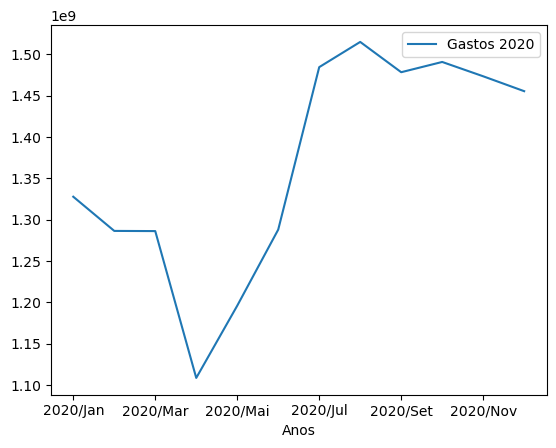

In [19]:
df_gastos_2020.plot(kind='line', x='Anos', y='Gastos 2020')

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

<Axes: xlabel='Anos', ylabel='Gastos 2020'>

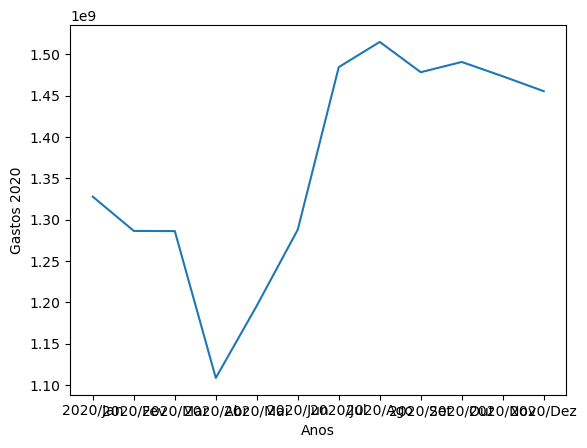

In [21]:
sns.lineplot(data=df_gastos_2020, x='Anos', y='Gastos 2020' )

In [22]:
gastos_sus = gastos_pop.copy()

In [23]:
pop_estados = pd.read_excel('./dados/POP2021_20230710.xls', header=1, usecols=[0,2], skipfooter=7)

In [24]:
gastos_sus.iloc[:,0] = gastos_sus.iloc[:,0].str.replace('[0-9]{2}\s','',regex=True)

In [25]:
# [ gastos_sus.iloc[i, 1:].str.replace(',','',regex=True).astype('float64') for i in range(gastos_sus.shape[0]) ]
casting_to_float = pd.DataFrame()
aux=0
for i in range(gastos_sus.shape[0]):
    aux = gastos_sus.iloc[i, 1:].str.replace('-','0',regex=True).str.replace(',','.',regex=True).astype('float64')
    casting_to_float = pd.concat([casting_to_float, pd.DataFrame(aux)], axis=1)
casting_to_float = casting_to_float.T

In [26]:
gastos_sus.iloc[:, 1:] = casting_to_float

In [27]:
gastos_sus

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
0,Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,9858841.18,9806315.07,14946369.28,15552930.66,16269008.71,15380532.08,14228814.25,12427865.05,10345616.78,1088059702.0
1,Acre,902416.0,1497206.26,1794028.48,1730469.42,1819443.92,1828496.0,2511754.59,2089107.14,2275708.53,...,3715723.12,3538427.92,4077045.92,6307616.67,6354514.15,3461663.11,4979239.3,4138751.64,0.0,475290315.3
2,Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.9,8477273.62,9368858.72,9352532.7,9363099.35,...,21621697.26,26163677.75,23445832.76,23154039.32,26127701.15,26447055.27,24457791.81,22731356.54,19840265.3,2061943007.0
3,Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3266928.47,3519773.73,4437161.1,5171370.92,4266254.94,3103979.88,3743330.65,3781921.16,3150835.05,352546288.7
4,Pará,18864744.11,19553758.2,21937342.7,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,38813794.18,39251569.26,40639703.77,46608262.09,55310881.51,48215050.1,45801750.84,43262884.3,14569318.55,4968811817.0
5,Amapá,1120973.34,1268740.33,974651.24,1141137.32,866346.18,1440978.95,1426659.48,1475551.38,1651341.43,...,2807807.85,2822559.17,3188210.98,3616822.4,4379596.14,3808085.03,5211715.56,5263137.94,5032883.11,337181964.1
6,Tocantins,3441592.69,4985688.85,6205612.6,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.5,...,7297673.11,9875312.13,10651036.24,9365632.9,9493726.37,10650363.76,9790960.71,9735208.07,773480.42,1110344733.0
7,Maranhão,10723506.39,13559679.41,13985142.36,14809416.46,14505727.38,14908091.32,15784899.4,15195312.89,14951277.75,...,31798852.85,32611445.91,44534337.62,50000737.43,52984947.37,50461554.99,50500013.97,41501696.81,36250671.51,4161325769.0
8,Piauí,7985142.43,10079928.25,10298372.45,10775976.33,10398360.88,10528253.88,11040107.92,10549176.4,10899198.97,...,22689390.32,20983255.97,21609265.95,27405790.99,30110761.69,31075168.71,29401741.26,27694895.48,20752326.97,2450508594.0
9,Ceará,15539821.9,25735101.55,28724625.75,30676457.06,30604453.47,31272395.18,30925391.36,27851438.72,30362719.9,...,52321247.96,56235209.03,68360158.15,78545339.5,86928378.41,109909481.1,90387647.21,75731882.46,75197971.95,7118540188.0


In [28]:
pop_estados = pop_estados.sort_values(by=pop_estados.columns[0])

In [29]:
pop_estados.reset_index(inplace=True,drop=True)

In [30]:
pop_estados['POPULAÇÃO ESTIMADA'] = list(map(lambda x: x.replace('.', '').replace('(', '').replace(')', '') if (type(x) == str) else x, pop_estados['POPULAÇÃO ESTIMADA']))

In [31]:
pop_estados['POPULAÇÃO ESTIMADA'] = pop_estados['POPULAÇÃO ESTIMADA'].astype('int32')

### Procurando as linhas que tem escrito 'Região'

In [32]:
colunas_pop_drop = pop_estados[pop_estados.iloc[:,0].str.find('Região') == 0].index

In [33]:
pop_estados.drop(colunas_pop_drop, axis=0, inplace=True)

In [34]:
pop_estados.reset_index(inplace=True,drop=True)

In [35]:
pop_estados.rename(columns={'BRASIL E UNIDADES DA FEDERAÇÃO': 'UF'}, inplace=True)

In [36]:
pop_estados.drop(index=5, inplace=True)

In [37]:
pop_estados.reset_index(inplace=True, drop=True)

### Usando join para concatenar as tabelas

In [38]:
gastos_sus_pop_estados = gastos_sus.set_index('Unidade da Federação').sort_values(by='Unidade da Federação').iloc[:-1,-1:].join(pop_estados.set_index('UF')).copy()


In [39]:
gastos_sus_pop_estados

,Total,POPULAÇÃO ESTIMADA
Unidade da Federação,,
Acre,475290315.3,906876
Alagoas,2394793269.0,33653512
Amapá,337181964.1,877613
Amazonas,2061943007.0,4269995
Bahia,10498497979.0,149852843
Ceará,7118540188.0,92405801
Distrito Federal,2778456617.0,30943254
Espírito Santo,3710941857.0,4108508
Goiás,5380180599.0,72065894


In [40]:
gastos_sus_pop_estados.rename(columns={'POPULAÇÃO ESTIMADA': 'População Estimada'}, inplace=True)

### Trocando as posições e/ou alterando os nomes das colunas

In [41]:
gastos_sus_pop_estados.columns = ['Gastos por Estado', 'População Estimada' ]

In [42]:
gastos_por_pessoa = [ round(gastos/pop ,2) for (gastos, pop) in gastos_sus_pop_estados.values ]

In [43]:
gastos_sus_pop_estados.insert(loc=2, column='Gastos por Pessoa', value=gastos_por_pessoa)

In [44]:
gastos_sus_pop_estados.iloc[:,2].sort_values()

Unidade da Federação
Sergipe                  56.19
Bahia                    70.06
Alagoas                  71.16
Piauí                    74.50
Goiás                    74.66
Ceará                    77.04
Distrito Federal         89.79
Pernambuco               95.54
Amapá                   384.20
Amazonas                482.89
Acre                    524.10
Roraima                 540.12
Pará                    566.11
Maranhão                581.74
Rondônia                599.39
Rio de Janeiro          637.44
Mato Grosso             669.03
Paraíba                 688.85
Tocantins               690.79
Rio Grande do Norte     805.25
Mato Grosso do Sul      886.30
Espírito Santo          903.23
São Paulo               949.45
Minas Gerais           1022.77
Santa Catarina         1143.69
Rio Grande do Sul      1187.21
Paraná                 1351.34
Name: Gastos por Pessoa, dtype: float64

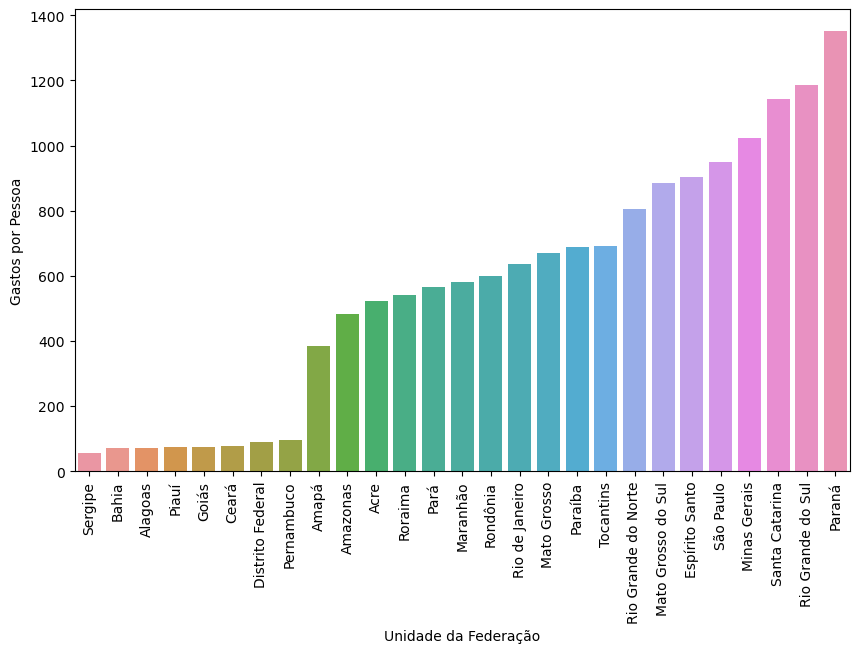

In [45]:
plt.figure(figsize=(10,6))
# # gastos_sus_pop_estados_ordem = gastos_sus_pop_estados.sort_values(by='Gastos por Estado',ascending=False)
# # sns.barplot(gastos_sus_pop_estados, x=gastos_sus_pop_estados.index, y=gastos_sus_pop_estados.sort_values(by='Gastos por Estado',ascending=False).iloc[:,0])
sns.barplot(gastos_sus_pop_estados, x=gastos_sus_pop_estados.iloc[:,2].sort_values().index, y=gastos_sus_pop_estados.iloc[:,2].sort_values())
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Gastos por Pessoa', ylabel='Unidade da Federação'>

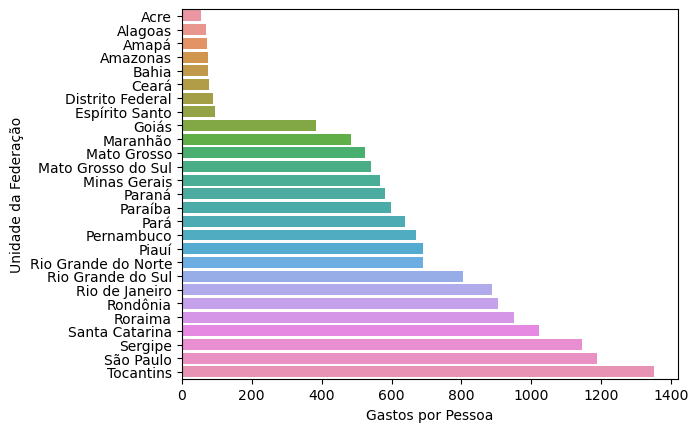

In [46]:
sns.barplot(data=gastos_sus_pop_estados.sort_values('Gastos por Pessoa'), x='Gastos por Pessoa', y=gastos_sus_pop_estados.index, orient='h')

In [47]:
# gastos_sus.loc['São Paulo']
sp_gastos = gastos_sus.set_index('Unidade da Federação').iloc[19, :-1]
sp_gastos

2008/Jan    91678473.48
2008/Fev    148677526.8
2008/Mar    156087269.2
2008/Abr    161227125.4
2008/Mai    187119397.6
               ...     
2021/Mai    510118421.5
2021/Jun    522748386.1
2021/Jul    515461288.7
2021/Ago    460348563.0
2021/Set    393119442.1
Name: São Paulo, Length: 165, dtype: object

In [48]:
# to_gastos = gastos_sus.set_index('Unidade da Federação').loc['Tocantins', :'2021/Set']
# rj_gastos = gastos_sus.set_index('Unidade da Federação').loc['Rio de Janeiro', :'2021/Set']
br_gastos = gastos_sus.set_index('Unidade da Federação').loc['Total', :'2021/Set']

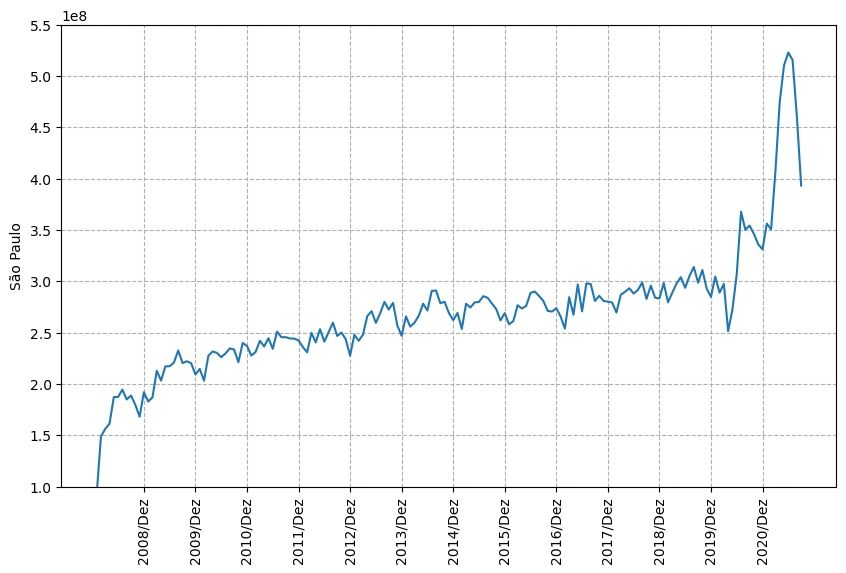

In [49]:
plt.figure(figsize=(10,6))
axis=sns.lineplot(data=sp_gastos, x=sp_gastos.index, y=sp_gastos)

# axis.xaxis.set_major_locator(ticker.IndexLocator(12,0))
axis.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=11))

# é preciso importar o ticker 'import matplotlib.ticker as ticker'
plt.grid(linestyle='--')
plt.ylim(1*pow(10,8), 5.5*pow(10,8))
# Configurar a rotação dos rótulos do eixo x
# Defina o ângulo de rotação desejado (90 graus no exemplo)
plt.xticks(rotation=90)
# Exibir o gráfico
plt.show()

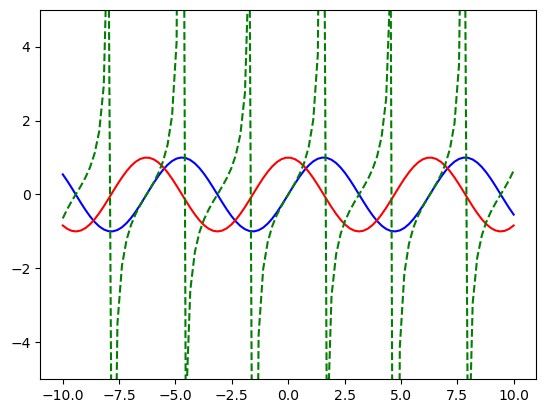

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Crie dados para os gráficos
x = np.linspace(-10, 10, 100)  # Amostras de x de 0 a 10
y1 = np.sin(x)  # Dados para o primeiro gráfico (seno de x)
y2 = np.cos(x)  # Dados para o segundo gráfico (cosseno de x)
y3 = np.tan(x)

# # Crie o primeiro gráfico
plt.plot(x, y1, label='Seno(x)', color='blue', linestyle='-')

# # Crie o segundo gráfico, que se sobrepõe ao primeiro
plt.plot(x, y2, label='Cosseno(x)', color='red', linestyle='-')

plt.plot(x, y3, label='Tangente(x)', color='green', linestyle='--')
plt.ylim(-5,5)
# # Adicione rótulos e legendas
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Dois Gráficos Sobrepostos')
# plt.legend()

# # Exiba o gráfico completo
plt.show()


In [51]:
estados_que_mais_gastaram_index = gastos_sus.set_index('Unidade da Federação').sort_values(by='Total', ascending=False).iloc[1:, :-1].index[:3]
estados_que_mais_gastaram_bool = gastos_sus.iloc[:-1,:-1].set_index('Unidade da Federação').index.isin(estados_que_mais_gastaram_index)
restante_dos_estados_bool = ~estados_que_mais_gastaram_bool
estados_que_mais_gastaram_index

Index(['São Paulo', 'Minas Gerais', 'Paraná'], dtype='object', name='Unidade da Federação')

In [52]:
restante_dos_estados = gastos_sus.iloc[:-1,:-1].set_index('Unidade da Federação').loc[restante_dos_estados_bool].sum()
estados_que_mais_gastaram = gastos_sus.iloc[:-1,:-1].set_index('Unidade da Federação').loc[estados_que_mais_gastaram_bool].sum()

### Fazendo o CASTING do 'Período' para o tipo DATE 

In [53]:
from datetime import date
periodo_index = estados_que_mais_gastaram.index
periodo_index = periodo_index.str.split('/', regex=True)
meses_do_ano = { periodo_index[mes][1]: mes + 1 for mes in range(12) }
novo_periodo_index = list(map(lambda x: date(int(x[0]), int(meses_do_ano[x[1]]), 1), periodo_index))
restante_dos_estados = pd.Series(data=restante_dos_estados.values, index=novo_periodo_index)
estados_que_mais_gastaram = pd.Series(data=estados_que_mais_gastaram.values, index=novo_periodo_index)

### Como convertemos para o tipo datime o periodo não é necessário incluir a função abaixo em destaque pois o seaborn já reconhece e faz a divisão automaticamente

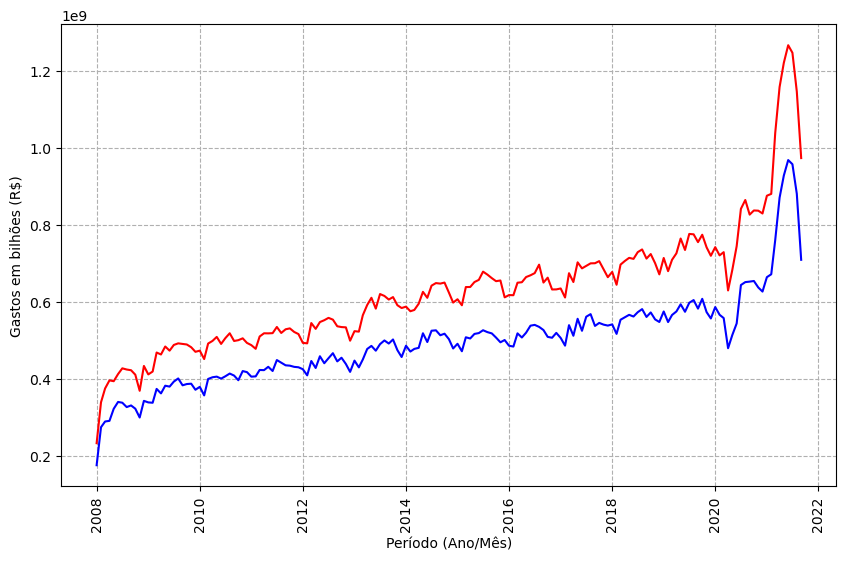

In [54]:

fig, axis = plt.subplots(figsize=(10,6))

# *********** axis.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=11)) ***********

axis.plot(restante_dos_estados, label=novo_periodo_index, color='red')
axis.plot(estados_que_mais_gastaram, label=novo_periodo_index, color='blue')
axis.set_xlabel('Período (Ano/Mês)')
axis.set_ylabel('Gastos em bilhões (R$)')
plt.xticks(rotation=90)
plt.grid(linestyle='--')

plt.show()


### Novamente, a biblioteca já percebe que existe um padrão que se repete anualmente e não é necessário usar a linha de código em destaque

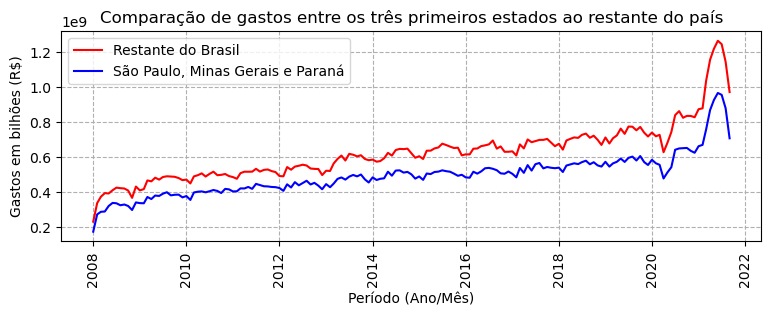

In [55]:
fig, axis = plt.subplots(figsize=(10,6))

# *********** axis.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=11)) ***********

axis.plot(restante_dos_estados, label=novo_periodo_index, color='red')
axis.plot(estados_que_mais_gastaram, label=novo_periodo_index, color='blue')
axis.set_xlabel('Período (Ano/Mês)')
axis.set_ylabel('Gastos em bilhões (R$)')
axis.legend(['Restante do Brasil', 'São Paulo, Minas Gerais e Paraná'])
plt.title('Comparação de gastos entre os três primeiros estados ao restante do país')
plt.subplots_adjust(top=0.5, bottom=0.15, left=0.15, right=0.85)
plt.xticks(rotation=90)
plt.grid(linestyle='--')

plt.show()

In [56]:
gastos_sus_copy = gastos_sus.copy()

In [57]:
gastos_sus_copy.iloc[:-1,1:-1].columns = pd.Series(novo_periodo_index)

In [58]:
gastos_sus_copy.iloc[:-1,1:-1].columns[0]
novas_colunas = { gastos_sus_copy.iloc[:-1,1:-1].columns[i]: novo_periodo_index[i] for i in range(len(novo_periodo_index))}

In [59]:
gastos_sus = gastos_sus.rename(columns=novas_colunas)

In [60]:
gastos_sus_melt = gastos_sus.melt(id_vars='Unidade da Federação', value_vars=gastos_sus.iloc[:-1,1:-1].columns)

In [61]:
gastos_sus_melt.columns = ['UF', 'Data', 'Gastos']

In [62]:
gastos_sus_melt_ordem = gastos_sus_melt.groupby(['Data', 'UF'])[['Gastos']].sum().sort_values(['Data','Gastos'], ascending=False)

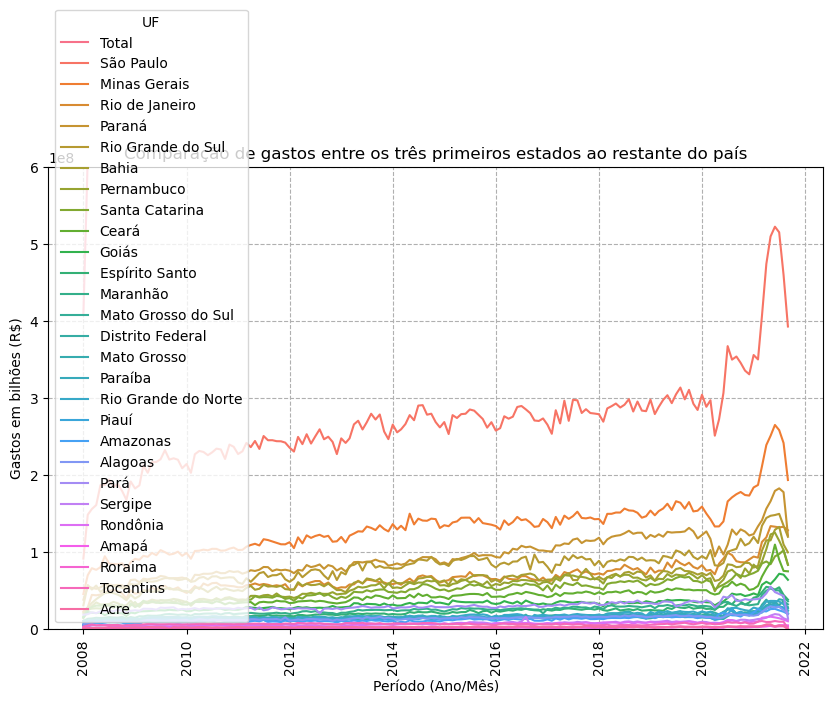

In [63]:
fig, axis = plt.subplots(figsize=(10,6))

# ->>>>>>>>>>> axis.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=11))

# axis.plot(gastos_sus_melt, label='Data', color='red')
# axis.plot(estados_que_mais_gastaram, label=novo_periodo_index, color='blue')
sns.lineplot(gastos_sus_melt_ordem, x='Data', y='Gastos', hue='UF')
axis.set_xlabel('Período (Ano/Mês)')
axis.set_ylabel('Gastos em bilhões (R$)')
# axis.legend(['Restante do Brasil', 'São Paulo, Minas Gerais e Paraná'])
plt.title('Comparação de gastos entre os três primeiros estados ao restante do país')
# plt.subplots_adjust(top=0.5, bottom=0.15, left=0.15, right=0.85)
plt.ylim(0,6*pow(10,8))
plt.xticks(rotation=90)
plt.grid(linestyle='--')


In [64]:
gastos_sus_melt.set_index('UF').sort_values(by=['UF','Data']).loc['Total']

,Data,Gastos
UF,,
Total,2008-01-01,408424859.2
Total,2008-02-01,613174269.2
Total,2008-03-01,664043058.4
Total,2008-04-01,686662861.4
Total,2008-05-01,715803639.5
...,...,...
Total,2021-05-01,2147582012.0
Total,2021-06-01,2233557063.0
Total,2021-07-01,2203235714.0


### A operação inversa do '.melt()' é '.pivot()'

In [65]:
gastos_sus_pivot = gastos_sus_melt.pivot(index='UF', columns='Data', values='Gastos')

In [66]:
gastos_sus_pivot.columns

Index([2008-01-01, 2008-02-01, 2008-03-01, 2008-04-01, 2008-05-01, 2008-06-01,
       2008-07-01, 2008-08-01, 2008-09-01, 2008-10-01,
       ...
       2020-12-01, 2021-01-01, 2021-02-01, 2021-03-01, 2021-04-01, 2021-05-01,
       2021-06-01, 2021-07-01, 2021-08-01, 2021-09-01],
      dtype='object', name='Data', length=165)

In [67]:
gastos_sus_pivot = gastos_sus_melt.pivot(index='UF', columns='Data', values='Gastos')

In [68]:
gastos_sus_pivot.head()

Data,2008-01-01,2008-02-01,2008-03-01,2008-04-01,2008-05-01,2008-06-01,2008-07-01,2008-08-01,2008-09-01,2008-10-01,...,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01
UF,,,,,,,,,,,,,,,,,,,,,
Acre,902416.0,1497206.26,1794028.48,1730469.42,1819443.92,1828496.0,2511754.59,2089107.14,2275708.53,1923886.57,...,3696997.31,3715723.12,3538427.92,4077045.92,6307616.67,6354514.15,3461663.11,4979239.3,4138751.64,0.0
Alagoas,6243726.32,8376622.16,8408336.22,9090794.82,9338771.45,10068210.08,9887061.61,9373432.0,9563580.5,9805242.71,...,17805273.37,17548566.67,18587484.37,22323051.11,26826283.56,29651474.26,28155677.93,28992503.97,24723159.91,19758417.78
Amapá,1120973.34,1268740.33,974651.24,1141137.32,866346.18,1440978.95,1426659.48,1475551.38,1651341.43,1866748.58,...,2566919.6,2807807.85,2822559.17,3188210.98,3616822.4,4379596.14,3808085.03,5211715.56,5263137.94,5032883.11
Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.9,8477273.62,9368858.72,9352532.7,9363099.35,8618318.83,...,17794528.56,21621697.26,26163677.75,23445832.76,23154039.32,26127701.15,26447055.27,24457791.81,22731356.54,19840265.3
Bahia,21211522.47,28189304.95,34181483.52,39026934.13,42949566.82,47025972.04,47481695.17,46931248.28,44883379.31,41920011.46,...,85898021.44,80041951.06,82385385.11,102012674.2,115544714.1,115405581.4,129189696.1,132882815.6,110063581.3,99862227.64


### Passando a coluna Data (dtype) de 'object' para 'datetime'

In [69]:
gastos_sus_melt['Data'] = gastos_sus_melt['Data'].astype('datetime64')

In [70]:
# gastos_sus_melt['Ano']

gastos_sus_melt.insert(loc=2, column='Mes', value=gastos_sus_melt['Data'].dt.month )
gastos_sus_melt.insert(loc=3, column='Ano', value=gastos_sus_melt['Data'].dt.year )

In [71]:
gastos_sus_melt.query("UF == 'São Paulo'").head()

,UF,Data,Mes,Ano,Gastos
19,São Paulo,2008-01-01,1,2008,91678473.48
47,São Paulo,2008-02-01,2,2008,148677526.8
75,São Paulo,2008-03-01,3,2008,156087269.2
103,São Paulo,2008-04-01,4,2008,161227125.4
131,São Paulo,2008-05-01,5,2008,187119397.6


### Problema: Os meses possuem numero de dias maiores que outros, uma forma de não perder esse tipo de informação e deixar a estimativa mais apurada é dividir pelo numero de dias do mês

In [72]:
import calendar

In [73]:
qtd_dias_mes = list(map(lambda x: calendar.monthrange(x.year, x.month)[1], gastos_sus_melt['Data']))

In [74]:
gastos_sus_melt.insert(loc=4, column='qtd_dias_mes', value=qtd_dias_mes)

In [75]:
gastos_sus_melt.columns = ['uf', 'data', 'mes', 'ano', 'qtd_dias_mes', 'gasto_mensal']
gastos_sus_melt

,uf,data,mes,ano,qtd_dias_mes,gasto_mensal
0,Rondônia,2008-01-01,1,2008,31,1388528.39
1,Acre,2008-01-01,1,2008,31,902416.0
2,Amazonas,2008-01-01,1,2008,31,4735529.42
3,Roraima,2008-01-01,1,2008,31,657889.53
4,Pará,2008-01-01,1,2008,31,18864744.11
...,...,...,...,...,...,...
4615,Mato Grosso do Sul,2021-09-01,9,2021,30,32338424.49
4616,Mato Grosso,2021-09-01,9,2021,30,27274369.25
4617,Goiás,2021-09-01,9,2021,30,64176809.02
4618,Distrito Federal,2021-09-01,9,2021,30,28509985.96


In [76]:
gastos_sus_melt['gasto_diario'] = gastos_sus_melt['gasto_mensal'] / gastos_sus_melt['qtd_dias_mes']
gastos_sus_melt

,uf,data,mes,ano,qtd_dias_mes,gasto_mensal,gasto_diario
0,Rondônia,2008-01-01,1,2008,31,1388528.39,44791.238387
1,Acre,2008-01-01,1,2008,31,902416.0,29110.193548
2,Amazonas,2008-01-01,1,2008,31,4735529.42,152759.013548
3,Roraima,2008-01-01,1,2008,31,657889.53,21222.242903
4,Pará,2008-01-01,1,2008,31,18864744.11,608540.132581
...,...,...,...,...,...,...,...
4615,Mato Grosso do Sul,2021-09-01,9,2021,30,32338424.49,1077947.483
4616,Mato Grosso,2021-09-01,9,2021,30,27274369.25,909145.641667
4617,Goiás,2021-09-01,9,2021,30,64176809.02,2139226.967333
4618,Distrito Federal,2021-09-01,9,2021,30,28509985.96,950332.865333


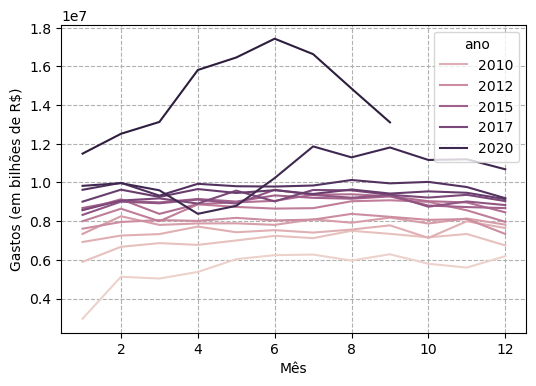

In [77]:
fig, axis = plt.subplots(figsize=(6,4))
axis.set_xlabel('Mês')
axis.set_ylabel('Gastos (em bilhões de R$)')
sns.lineplot(gastos_sus_melt[gastos_sus_melt['uf'] == "São Paulo"], x='mes', y='gasto_diario', hue='ano')
# sns.lineplot(gastos_sus_melt[(gastos_sus_melt['uf'] == "São Paulo") & (gastos_sus_melt['ano'] == 2021)], x='mes', y='gasto_diario')

plt.grid(linestyle='--')
plt.show()

### Como inserir uma linha dentro de um DF usando '.concat()'

In [78]:
pop_estados.columns = ['uf', 'populacao']

In [79]:
total = {
    'uf': 'Total',
    'populacao': pop_estados['populacao'].sum()
}
total


{'uf': 'Total', 'populacao': 692069833}

In [80]:
pop_estados = pd.concat([pop_estados, pd.DataFrame(data=total, index=[27])], axis=0)

In [81]:
gasto_2020 = gastos_sus.set_index('Unidade da Federação').loc[: 'Distrito Federal', date(2020, 1, 1) : date(2020, 12, 1)].sum(axis=1)

In [82]:
total_gasto_2020 = {
    'Total' : round(gasto_2020.sum(), 2)
}

gasto_2020 = pd.concat([pd.Series(total_gasto_2020), gasto_2020]).sort_index()

In [83]:
pop_estados=pop_estados.sort_values(by='uf')

In [84]:
pop_estados['gasto_per_capita_2020'] = [round((gasto/ pop),2) for (gasto, pop) in zip(gasto_2020, pop_estados['populacao'])]
colunas = pop_estados.set_index('uf').index
colunas = ~colunas.isin(['Total'])

In [85]:
pop_estados[colunas]

,uf,populacao,gasto_per_capita_2020
0,Acre,906876,44.13
1,Alagoas,33653512,6.11
2,Amapá,877613,31.76
3,Amazonas,4269995,49.25
4,Bahia,149852843,6.10
5,Ceará,92405801,6.89
6,Distrito Federal,30943254,8.58
7,Espírito Santo,4108508,90.37
8,Goiás,72065894,6.55
9,Maranhão,7153262,52.53


### Gasto per capita

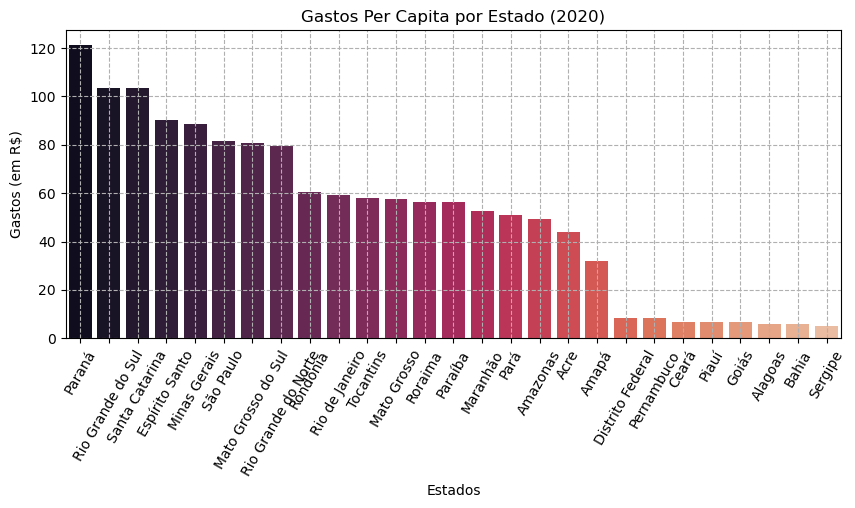

In [86]:
fig, axis = plt.subplots(figsize=(10,4))
paleta_cores = sns.color_palette('rocket', 30)
sns.barplot(pop_estados[colunas].sort_values(pop_estados.columns[2], ascending=False), x='uf', y='gasto_per_capita_2020', palette=paleta_cores)
axis.set_xlabel('Estados')
axis.set_ylabel('Gastos (em R$)')
plt.title('Gastos Per Capita por Estado (2020)')
plt.xticks(rotation=60)

plt.grid(linestyle='--')
plt.show()

### **** Uma nova maneira de filtrar ****

In [87]:
estados_sudeste = ['São Paulo', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro']
gasto_sudeste = gastos_sus_melt.query('uf in @estados_sudeste').groupby(['uf','ano'])[['gasto_diario','gasto_mensal']].sum()
gasto_sudeste

gasto_diario  gasto_mensal
uf             ano                             
Espírito Santo 2008  4.456161e+06  1.358865e+08
               2009  5.694226e+06  1.731535e+08
               2010  6.086733e+06  1.851400e+08
               2011  6.812937e+06  2.072759e+08
               2012  7.228139e+06  2.204127e+08
               2013  7.845619e+06  2.385048e+08
               2014  8.321978e+06  2.530979e+08
               2015  8.787088e+06  2.672351e+08
               2016  9.738343e+06  2.969788e+08
               2017  1.016800e+07  3.091558e+08
               2018  9.979818e+06  3.034256e+08
               2019  1.051756e+07  3.199476e+08
               2020  1.216960e+07  3.712740e+08
               2021  1.415555e+07  4.294535e+08
Minas Gerais   2008  3.125936e+07  9.530384e+08
               2009  3.814672e+07  1.159958e+09
               2010  4.023478e+07  1.223766e+09
               2011  4.346857e+07  1.321731e+09
               2012  4.597540e+07  1.402515e+09
               2013  4.990431e+07  1.517973e+09
               2014  5.454868e+07  1.658841e+09
               2015  5.510134e+07  1.674940e+09
               2016  5.436512e+07  1.657940e+09
               2017  5.650215e+07  1.718544e+09
               2018  5.886909e+07  1.790290e+09
               2019  6.211990e+07  1.889157e+09
               2020  6.222973e+07  1.897993e+09
               2021  6.697437e+07  2.032859e+09
Rio de Janeiro 2008  1.703190e+07  5.199878e+08
               2009  2.030306e+07  6.174744e+08
               2010  2.197023e+07  6.682493e+08
               2011  2.251643e+07  6.846035e+08
               2012  2.261310e+07  6.898075e+08
               2013  2.362126e+07  7.184198e+08
               2014  2.519161e+07  7.659762e+08
               2015  2.679643e+07  8.147383e+08
               2016  2.591264e+07  7.902823e+08
               2017  2.805795e+07  8.535432e+08
               2018  3.019026e+07  9.180958e+08
               2019  3.211017e+07  9.768767e+08
               2020  3.385229e+07  1.032895e+09
               2021  3.559946e+07  1.080920e+09
São Paulo      2008  6.688009e+07  2.039524e+09
               2009  8.365665e+07  2.544643e+09
               2010  8.970859e+07  2.728177e+09
               2011  9.499507e+07  2.888085e+09
               2012  9.602552e+07  2.928499e+09
               2013  1.031744e+08  3.137332e+09
               2014  1.074705e+08  3.268009e+09
               2015  1.080276e+08  3.285222e+09
               2016  1.083926e+08  3.305056e+09
               2017  1.104846e+08  3.361180e+09
               2018  1.131945e+08  3.442007e+09
               2019  1.173227e+08  3.567637e+09
               2020  1.247657e+08  3.806209e+09
               2021  1.313963e+08  3.989407e+09

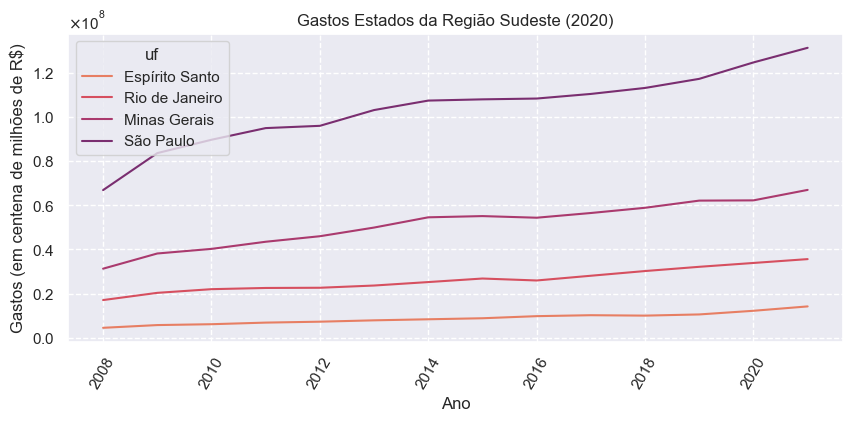

In [124]:
from matplotlib.ticker import ScalarFormatter

fig, axis = plt.subplots(figsize=(10,4))
paleta_cores = sns.color_palette("flare",4)

sns.lineplot(gasto_sudeste.reset_index().sort_values(by='gasto_diario'), 
            x='ano', y='gasto_diario', 
            hue='uf', palette=paleta_cores)

axis.set_xlabel('Ano')
axis.set_ylabel('Gastos (em centena de milhões de R$)')
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)  # Desativa a notação científica, se estiver ativada

# Aplica o ScalarFormatter ao eixo vertical
axis.yaxis.set_major_formatter(formatter)

plt.title('Gastos Estados da Região Sudeste (2020)')
plt.xticks(rotation=60)

plt.grid(linestyle='--')
plt.show()


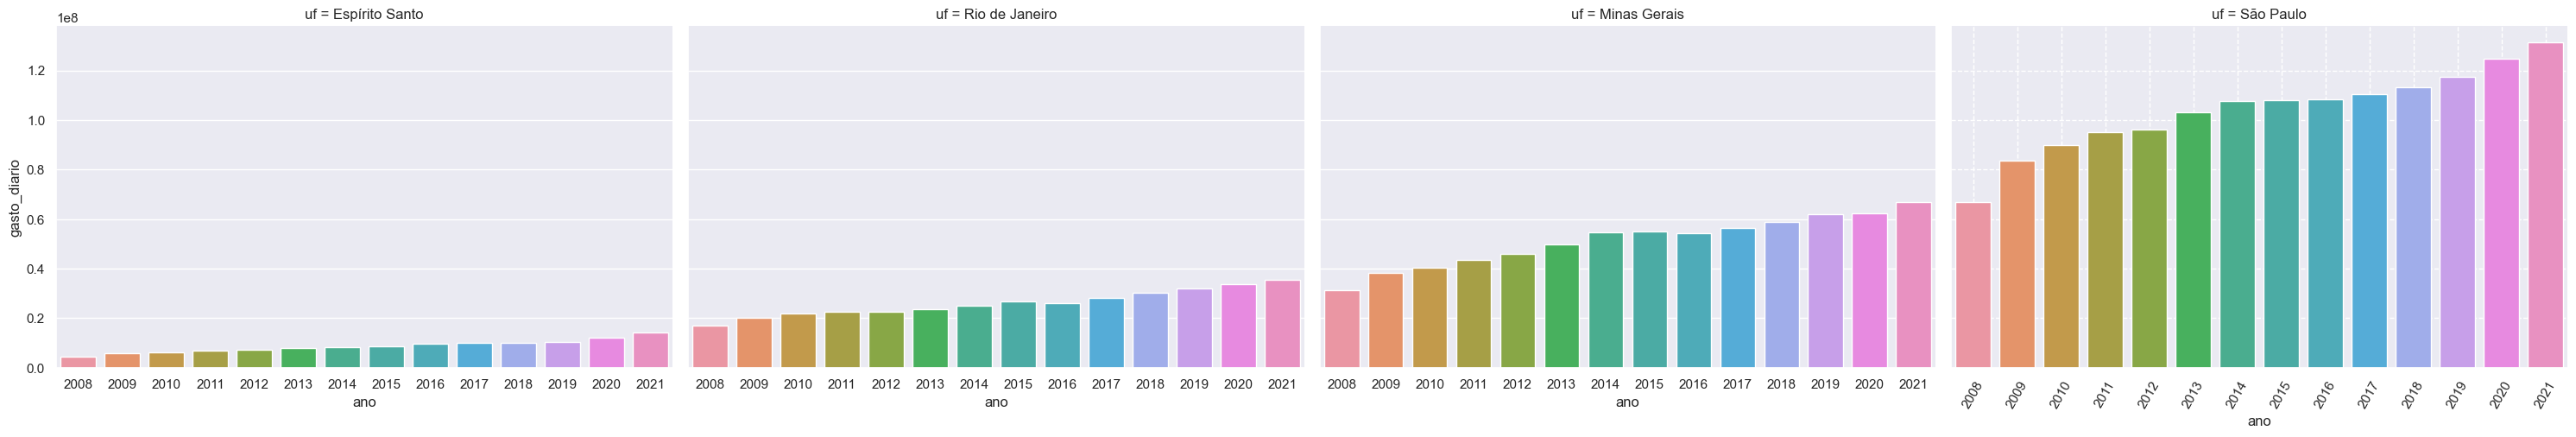

In [156]:
from matplotlib.ticker import ScalarFormatter

sns.catplot(gasto_sudeste.reset_index().sort_values(by='gasto_diario'), 
            x='ano', y='gasto_diario', 
            col='uf', kind='bar',height=5, aspect=1.5,
)

plt.xticks(rotation=60)

plt.grid(linestyle='--')
plt.show()


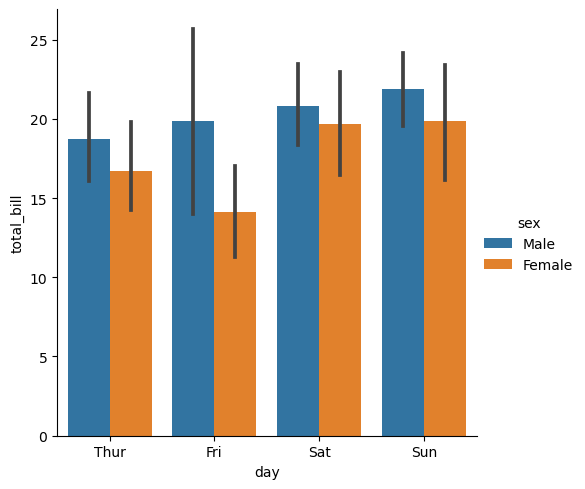

<Figure size 1000x600 with 0 Axes>

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo de dados
sample_data = sns.load_dataset("tips")

# Crie um catplot (gráfico categórico)
grafico = sns.catplot(x="day", y="total_bill", hue="sex", data=sample_data, kind="bar")
# grafico = sns.barplot(x="day", y="total_bill", hue="sex", data=sample_data)
# Aumente o tamanho da figura ajustando figsize
plt.figure(figsize=(10, 6))  # Defina as dimensões desejadas (largura, altura)

# Exiba o gráfico
plt.show()


In [4]:
sample_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
